# Modeling an Epidemic

The so-called SIR model describes the spread of a disease in a population fixed to N individuals over time t. The model divides the population into three compartments: susceptible (S), infected (I), and recovered (R). The model is governed by the following system of ordinary differential equations:

$$\begin{align}
\frac{dS}{dt} &= -\beta \frac{SI}{N} \\
\frac{dI}{dt} &= \beta \frac{SI}{N} - \gamma I \\
\frac{dR}{dt} &= \gamma I
\end{align}$$


### The SIR Model Parameters

The parameters of the model are as follows:

- $\beta$ is the average number of contacts per person per time, multiplied by the probability of disease transmission in a contact between a susceptible and an infectious subject.

- $\gamma$ is the average number of recovered individuals per time.

Some remarks on the model :

The average infection period (i.e. the mean period during which an infected individual can pass it on) is equal to $\frac{1}{\gamma}$.

The assumption of a constant average number of contacts $\beta$ is a strong and constraining assumption : it cannot be applied to all diseases.

We can imagine improving this model by taking into account for example:
newborns that would correspond to 𝑆 susceptible individuals. We would introduce a birth rate $b$.
the deceased who would leave the compartments $S$ or $I$ with the same rate $b$ : this allows to consider a constant population $N$.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy import integrate

In [24]:
N = 350. #Total number of individuals, N
I0, R0 = 1., 0 #Initial number of infected and recovered individuals
S0 = N - I0 - R0 #Susceptible individuals to infection initially is deduced
beta, gamma = 0.4, 0.1 #Contact rate and mean recovery rate
tmax = 160 #A grid of time points (in days)
Nt = 160
t = np.linspace(0, tmax, Nt+1)

In [25]:
def SIR_model(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return np.array([dSdt, dIdt, dRdt])

In [26]:
X0 = S0, I0, R0 #Initial conditions vector
res = integrate.odeint(SIR_model, X0, t, args=(N, beta, gamma))
S, I, R = res.T
Seuil = 1 - 1 / (beta/gamma)
print("The epidemic will stop when the number of infected people will be less than", Seuil*N, "individuals")

Rep0 = beta/gamma
print("The basic reproduction number is", Rep0)

The epidemic will stop when the number of infected people will be less than 262.5 individuals
The basic reproduction number is 4.0


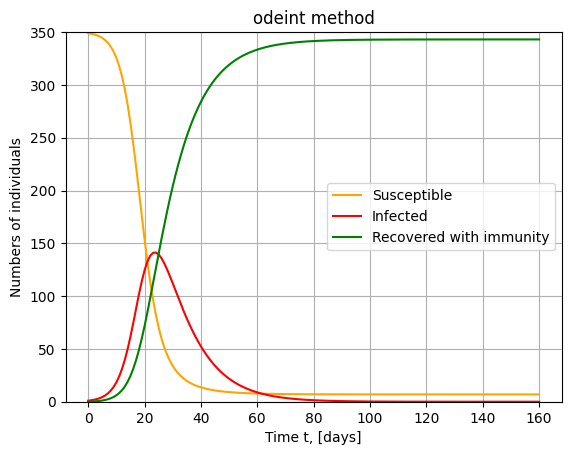

In [27]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, S, 'orange', label='Susceptible')
plt.plot(t, I, 'r', label='Infected')
plt.plot(t, R, 'g', label='Recovered with immunity')
plt.xlabel('Time t, [days]')
plt.ylabel('Numbers of individuals')
plt.ylim([0,N])
plt.legend()

plt.show();

### Euler method

In [28]:
def Euler(func, X0, t, N, beta, gamma):
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        X[i+1] = X[i] + func(X[i], t[i], N, beta, gamma) * dt
    return X

In [29]:
Xe = Euler(SIR_model, X0, t, N, beta, gamma)

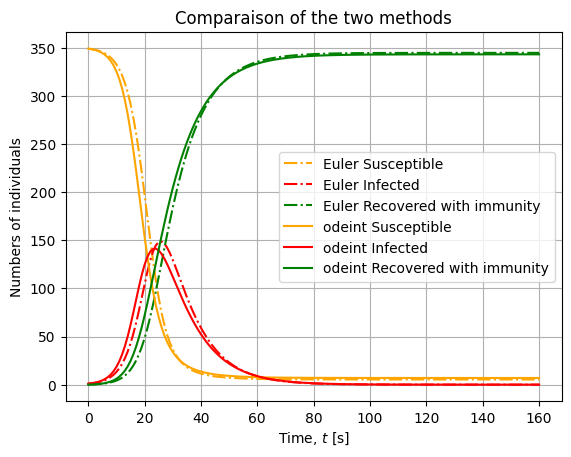

In [30]:
plt.figure()

plt.plot(t, Xe[:,0], color = 'orange', linestyle = '-.', label='Euler Susceptible')
plt.plot(t, Xe[:,1], 'r-.', label='Euler Infected')
plt.plot(t, Xe[:,2], 'g-.', label='Euler Recovered with immunity')
plt.plot(t, S, 'orange', label='odeint Susceptible')
plt.plot(t, I, 'r', label='odeint Infected')
plt.plot(t, R, 'g', label='odeint Recovered with immunity')
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel("Numbers of individuals")
plt.legend(loc = "best")
plt.title("Comparaison of the two methods")
plt.show();

### What is $R_0$ ?

$R_0 = \frac{\beta}{\gamma}$ is a parameter describing the average number of new infections due to a sick individual. It’s commonly called the basic reproduction number. It’s a fundamental concept in epidemiology.

If $R_0$>1 the epidemic will persist otherwise it will die out.

If a disease has an $R_0$=3 for example, so on average, a person who has this sickness will pass it on to three other people.